# Decision Tree Classification

In [236]:
#importing dataset
dataset=read.csv("advertisement.csv")

In [237]:
str(dataset)

'data.frame':	400 obs. of  5 variables:
 $ userid          : chr  "e3e70682-c209-4cac-a29f-6fbed82c07cd" "d4713d60-c8a7-4639-ab11-67b367a9c378" "23c6612f-4826-4673-a3a7-711a81332876" "12e0c8b2-bad6-40fb-9948-8dec4f65d4d9" ...
 $ gender          : chr  "female" "female" "male" "female" ...
 $ age             : int  20 48 57 48 53 23 33 27 24 56 ...
 $ estimated_salary: int  63936 76930 62834 43199 92522 82274 72625 88716 69511 67703 ...
 $ purchased       : int  1 0 0 1 1 0 0 0 1 1 ...


In [238]:
summary(dataset)

    userid             gender               age        estimated_salary
 Length:400         Length:400         Min.   :18.00   Min.   :30031   
 Class :character   Class :character   1st Qu.:28.75   1st Qu.:46097   
 Mode  :character   Mode  :character   Median :42.00   Median :63632   
                                       Mean   :41.26   Mean   :64498   
                                       3rd Qu.:54.00   3rd Qu.:82411   
                                       Max.   :65.00   Max.   :99832   
   purchased    
 Min.   :0.000  
 1st Qu.:0.000  
 Median :1.000  
 Mean   :0.525  
 3rd Qu.:1.000  
 Max.   :1.000  

# Data Preprocessing

In [239]:
#dataset=dataset[,c(3:5)]#1st all rows ,, then 3 to 5 column

dataset=dataset[3:5]

In [240]:
dataset

age,estimated_salary,purchased
<int>,<int>,<int>
20,63936,1
48,76930,0
57,62834,0
48,43199,1
53,92522,1
23,82274,0
33,72625,0
27,88716,0
24,69511,1


In [241]:
summary(dataset)

      age        estimated_salary   purchased    
 Min.   :18.00   Min.   :30031    Min.   :0.000  
 1st Qu.:28.75   1st Qu.:46097    1st Qu.:0.000  
 Median :42.00   Median :63632    Median :1.000  
 Mean   :41.26   Mean   :64498    Mean   :0.525  
 3rd Qu.:54.00   3rd Qu.:82411    3rd Qu.:1.000  
 Max.   :65.00   Max.   :99832    Max.   :1.000  

In [242]:
str(dataset)

'data.frame':	400 obs. of  3 variables:
 $ age             : int  20 48 57 48 53 23 33 27 24 56 ...
 $ estimated_salary: int  63936 76930 62834 43199 92522 82274 72625 88716 69511 67703 ...
 $ purchased       : int  1 0 0 1 1 0 0 0 1 1 ...


# Encode target as factor

## if dependent variable is numeric means then the model will consider it will be as regression probelm not as classification probelm so we converting as factor

In [243]:
dataset$purchased=factor(dataset$purchased,levels=c(0,1))

In [244]:
summary(dataset)

      age        estimated_salary purchased
 Min.   :18.00   Min.   :30031    0:190    
 1st Qu.:28.75   1st Qu.:46097    1:210    
 Median :42.00   Median :63632             
 Mean   :41.26   Mean   :64498             
 3rd Qu.:54.00   3rd Qu.:82411             
 Max.   :65.00   Max.   :99832             

In [245]:
str(dataset)

'data.frame':	400 obs. of  3 variables:
 $ age             : int  20 48 57 48 53 23 33 27 24 56 ...
 $ estimated_salary: int  63936 76930 62834 43199 92522 82274 72625 88716 69511 67703 ...
 $ purchased       : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 1 2 2 ...


# splitting dataset

In [246]:
# install.packages("caTools")

In [247]:
library("caTools")

In [248]:
set.seed(8)

In [249]:
split=sample.split(dataset$purchased,SplitRatio = 0.65)

In [250]:
str(split)

 logi [1:400] TRUE TRUE TRUE TRUE FALSE FALSE ...


In [251]:
summary(split)

   Mode   FALSE    TRUE 
logical     140     260 

In [252]:
table(split)

split
FALSE  TRUE 
  140   260 

In [253]:
training_split=subset(dataset,split==TRUE)

In [254]:
table(training_split)

, , purchased = 0

    estimated_salary
age  30059 30095 30674 30738 31060 31191 31262 31382 32124 32774 32880 32986
  18     0     0     0     0     0     0     0     0     0     0     0     0
  19     0     0     0     0     0     0     0     0     0     0     0     0
  20     0     0     0     0     0     0     0     0     0     0     0     0
  21     0     0     0     0     0     0     0     0     0     0     0     0
  22     0     0     0     0     0     0     0     0     0     0     0     0
  23     0     0     0     0     0     0     0     1     0     0     0     0
  24     0     0     1     0     0     0     0     0     0     0     0     0
  25     0     0     0     0     0     0     0     0     0     0     0     0
  26     0     0     0     0     0     0     0     0     0     0     0     0
  27     0     0     0     0     0     0     0     0     0     0     0     0
  28     0     0     0     0     0     0     0     0     0     0     0     0
  29     0     0     0     0     0  

In [255]:
str(training_split)

'data.frame':	260 obs. of  3 variables:
 $ age             : int  20 48 57 48 33 27 24 56 57 27 ...
 $ estimated_salary: int  63936 76930 62834 43199 72625 88716 69511 67703 64086 35064 ...
 $ purchased       : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 2 2 2 1 ...


In [256]:
testing_set=subset(dataset,split==FALSE)

In [257]:
table(testing_set)

, , purchased = 0

    estimated_salary
age  30031 30132 30444 30941 33185 33778 34760 35020 35300 36062 36526 36846
  18     0     0     0     0     0     0     0     0     0     0     0     0
  19     1     0     0     0     0     0     0     0     0     0     0     0
  20     0     0     0     0     0     0     0     0     0     0     0     0
  21     0     0     0     0     0     0     0     0     0     0     0     0
  22     0     0     0     0     0     0     0     0     0     0     0     0
  23     0     0     0     0     0     0     0     0     0     0     0     0
  24     0     0     0     0     0     0     0     0     0     0     0     0
  25     0     0     0     0     0     0     0     0     0     0     0     0
  26     0     0     0     0     0     0     0     0     0     0     0     0
  27     0     0     0     0     0     0     0     0     0     0     0     0
  28     0     1     0     0     0     0     0     0     0     0     0     0
  29     0     0     0     0     0  

In [258]:
str(testing_set)

'data.frame':	140 obs. of  3 variables:
 $ age             : int  53 23 54 63 61 20 18 38 25 61 ...
 $ estimated_salary: int  92522 82274 61733 98756 84974 39698 91816 30444 50242 64035 ...
 $ purchased       : Factor w/ 2 levels "0","1": 2 1 2 2 2 1 2 1 2 2 ...


## Feature Scaling

In [259]:
training_split[-3]=scale(training_split[-3])

In [260]:
str(training_split)

'data.frame':	260 obs. of  3 variables:
 $ age             : num  -1.506 0.446 1.074 0.446 -0.6 ...
 $ estimated_salary: num  -0.0103 0.6031 -0.0623 -0.9891 0.3999 ...
 $ purchased       : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 2 2 2 1 ...


In [261]:
summary((training_split))

      age           estimated_salary   purchased
 Min.   :-1.64536   Min.   :-1.60933   0:124    
 1st Qu.:-0.80874   1st Qu.:-0.93305   1:136    
 Median : 0.02789   Median :-0.04188            
 Mean   : 0.00000   Mean   : 0.00000            
 3rd Qu.: 0.88194   3rd Qu.: 0.91566            
 Max.   : 1.63142   Max.   : 1.68413            

In [262]:
sd(training_split$age)

[1] 1

In [263]:
sd(training_split$estimated_salary)

[1] 1

In [264]:
testing_set[-3]=scale(testing_set[-3])

# Fit Decision Tree to training set

In [265]:
# install.packages("rpart")

In [266]:
library("rpart")

In [267]:
classifier=rpart(formula = purchased~.,data = training_split)

In [268]:
classifier 

n= 260 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 260 124 1 (0.4769231 0.5230769)  
     2) age< 1.387404 236 118 0 (0.5000000 0.5000000)  
       4) estimated_salary< -1.138488 37  13 0 (0.6486486 0.3513514) *
       5) estimated_salary>=-1.138488 199  94 1 (0.4723618 0.5276382)  
        10) estimated_salary>=-0.3397736 137  64 0 (0.5328467 0.4671533)  
          20) estimated_salary< -0.01709677 21   5 0 (0.7619048 0.2380952) *
          21) estimated_salary>=-0.01709677 116  57 1 (0.4913793 0.5086207)  
            42) estimated_salary< 1.305472 87  41 0 (0.5287356 0.4712644)  
              84) estimated_salary>=0.9447029 27   8 0 (0.7037037 0.2962963) *
              85) estimated_salary< 0.9447029 60  27 1 (0.4500000 0.5500000)  
               170) age< 0.2021845 43  21 0 (0.5116279 0.4883721)  
                 340) age>=-0.3555658 13   4 0 (0.6923077 0.3076923) *
                 341) age< -0.3555658 30  13 1 (0.4333333 0.5666667)  
     

# prediction

In [269]:
y_pred=predict(classifier,newdata = testing_set[-3])

In [270]:
head(y_pred)

,0,1
5,0.2105263,0.7894737
6,0.2222222,0.7777778
11,0.7619048,0.2380952
14,0.2500000,0.7500000
15,0.2500000,0.7500000
19,0.6486486,0.3513514


In [271]:
y_predition=predict(classifier,newdata = testing_set[-3],type="class")

In [272]:
head(y_predition)

5  6 11 14 15 19 
 1  1  0  1  1  0 
Levels: 0 1

# confusion matrix

In [273]:
testing_set[,3]
testing_set$purchased

[1] 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 [38] 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1
 [75] 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1
[112] 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1
Levels: 0 1

[1] 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 [38] 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1
 [75] 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1
[112] 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1
Levels: 0 1

In [274]:
confusion=table(testing_set$purchased,y_predition)

In [275]:
confusion

   y_predition
     0  1
  0 30 36
  1 33 41

In [276]:
(30+41)/100

[1] 0.71

In [277]:
# install.packages("caret")

In [278]:
library("caret")

In [279]:
confusionMatrix(testing_set$purchased,y_predition)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 30 36
         1 33 41
                                          
               Accuracy : 0.5071          
                 95% CI : (0.4214, 0.5926)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : 0.8652          
                                          
                  Kappa : 0.0086          
                                          
 Mcnemar's Test P-Value : 0.8097          
                                          
            Sensitivity : 0.4762          
            Specificity : 0.5325          
         Pos Pred Value : 0.4545          
         Neg Pred Value : 0.5541          
             Prevalence : 0.4500          
         Detection Rate : 0.2143          
   Detection Prevalence : 0.4714          
      Balanced Accuracy : 0.5043          
                                          
       'Positive' Class : 0               
                                    

# plot

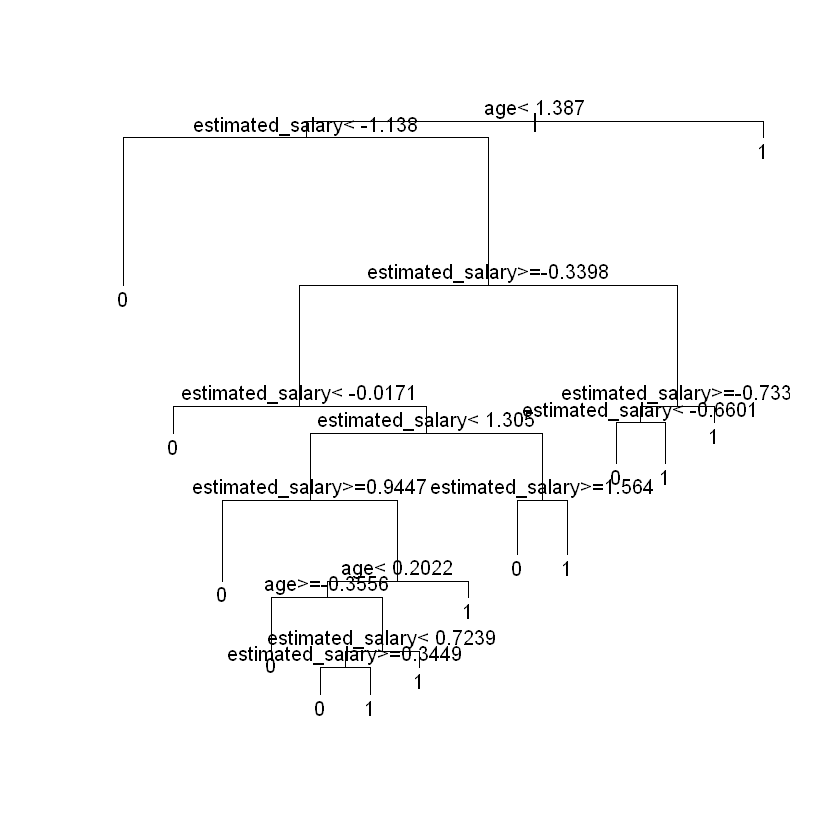

In [282]:
# Create a plot with a margin
plot(classifier)

# Add text to the plot
text(classifier, cex = 1)